# Gambler Problem

Anshuman Dash, Phillip Peng, Frank Yao

**Problem statement:** a gambler repeatedly places bets on the outcomes of a sequence of coin
flips. If the flip is heads, then she wins as many dollars as she has bet on that flip; if it is tails, she
loses all the bet. The game ends when the gambler reaches her goal of making $100, or when she runs
out of money. At each time, the gambler chooses how much of her money to bet on the next flip.
This situation can be formulated as an undiscounted, episodic, finite MDP. The state is the
gambler’s capital s ∈ {0, 1, 2, . . . , 99, 100}, and her actions are stakes (i.e., how much to bet) a ∈
{0, 1, . . . , min{s, 100 − s}}. The rewards are zero for all state transitions, except when the transition
leads to the gambler reaching her $100 goal, in which case the reward is +1. Let ph be the probability
that the coin flips heads.

**States**: Current amount of capital s $\in$ {1,2,...,99}\
**Actions**: Bet a $\in$ {0,1,...,min(s,100-s)} \
**Transitions**: Money Gained or lost dependent on Coin Flip \
**Reward**: 0 for any action until it reaches $100 where it gets a reward of +1

Package Imports

In [3]:
import numpy as np
import random
from tqdm import tqdm
from matplotlib import pyplot as plt

Reward Function

In [4]:
def r(s,a):
    if s == 100:
        return 1
    else:
        return 0

In [37]:
p_h = .5
# s = capital you have
# a = capital to bet
def T(s,a):
    ...

def value_iteration(p_h, iters = float('inf')):
    S = np.zeros(101)
    S[100] = 1
    A = [[0] for _ in range(100)]
    it = 0
    
    while it < iters:
        it+=1
        old = S.copy()
        for s in range(1,len(S)-1):
            choices = [S[s+a]*p_h + S[s-a]*(1-p_h) for a in range(0, min(s,100-s)+1)]
            choices = [round(x,8) for x in choices]
            S[s] = max(choices)
            best_a, best_val = None, float('-inf')
            for a,v in enumerate(choices):
                if v - 1e-6 > best_val or best_a == 0:
                    best_val = v
                    best_a = a
            # A[s] = np.argwhere(choices==max(choices)).flatten().tolist()
            A[s] = best_a
        if sum(abs(old-S)) == 0:
            break
    return S,A

In [59]:
values, actions = value_iteration(.55)

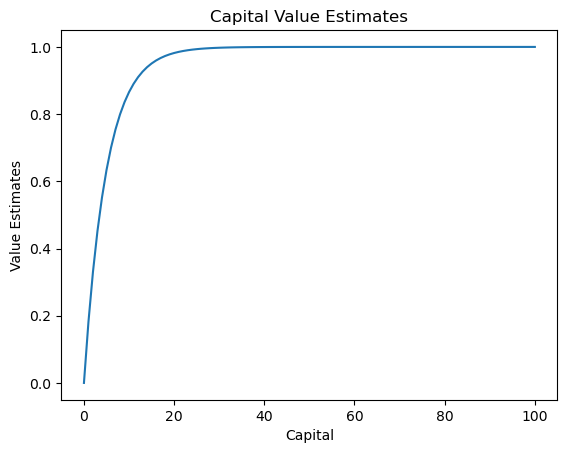

<Figure size 640x480 with 0 Axes>

In [60]:
plt.plot(range(101), values)
plt.title("Capital Value Estimates"); plt.xlabel("Capital"); plt.ylabel("Value Estimates")
plt.show(); plt.savefig("CaptialValueEstimates_ph25.jpg")

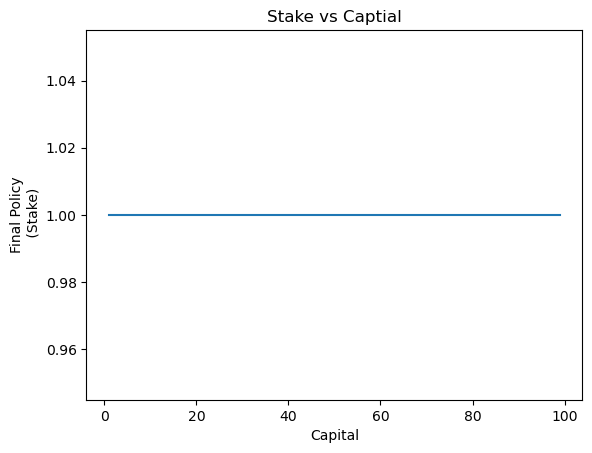

In [63]:
plt.step(range(1,100), actions[1:])
plt.xlabel("Capital"); plt.ylabel("Final Policy\n (Stake)"); plt.title("Stake vs Captial")
plt.savefig(".\plots\StakeVCapital_ph55.jpg")
plt.show()